In [2]:
import os
import sys
import re
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad.notebook import Nb

In [3]:
# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../output/scrnaseq-wf/scrnaseq_combine_force')

last updated: 2018-11-09 
Git hash:


In [208]:
cluster_annot = {
    0: 'LS',
    1: 'MC',
    2: 'MS',
    3: 'ES',
    4: 'LC',
    5: 'EC',
    6: 'SP',
    7: 'TE',
    8: 'PC',
    9: 'U9',
    10: 'U10',
    11: 'U11'
}

cluster_order = [
'SP',
'ES',
'MS',
'LS',
'EC',
'MC',
'LC',
'TE',
'PC',
]

clusters = nbconfig.seurat.get_clusters('res.0.6').map(cluster_annot)
clusters = clusters[clusters.isin(cluster_order)]
clusters = clusters.astype('category').cat.as_ordered()
clusters = clusters.cat.reorder_categories(cluster_order)
clusters.index.name = 'cell_id'

In [209]:
clusters

cell_id
rep1_AAACCTGAGACAAGCC    MC
rep1_AAACCTGAGCTTATCG    MC
rep1_AAACCTGGTGTAATGA    EC
rep1_AAACCTGGTTCATGGT    MS
rep1_AAACCTGTCCCTCTTT    MC
rep1_AAACGGGAGACTGGGT    LC
rep1_AAACGGGCACAGTCGC    LS
rep1_AAACGGGGTCGCGTGT    LS
rep1_AAACGGGGTGTTAAGA    EC
rep1_AAACGGGTCGTCCAGG    MC
rep1_AAACGGGTCTTGTATC    MC
rep1_AAAGATGAGTATCGAA    LC
rep1_AAAGATGAGTGGTAGC    TE
rep1_AAAGATGGTGTGGTTT    LC
rep1_AAAGCAAAGGCATGTG    MC
rep1_AAAGCAACAGCTCGCA    LC
rep1_AAAGCAACAGGCTGAA    ES
rep1_AAAGCAAGTCTAGGTT    SP
rep1_AAAGCAAGTTGAGGTG    EC
rep1_AAAGTAGAGGCTAGCA    MC
rep1_AAAGTAGCACTGTTAG    MC
rep1_AAAGTAGTCCGCATAA    MS
rep1_AAAGTAGTCTTGTACT    MC
rep1_AAATGCCCACTGAAGG    LC
rep1_AAATGCCGTAAAGGAG    TE
rep1_AAATGCCGTTCGTCTC    LS
rep1_AAATGCCTCGATAGAA    LS
rep1_AAATGCCTCGCAAGCC    LS
rep1_AACACGTCACCAGGTC    MS
rep1_AACACGTGTGATGTCT    TE
                         ..
rep3_TTTGGTTCAATGCCAT    MS
rep3_TTTGGTTCAGGGTACA    MS
rep3_TTTGGTTCAGTAACGG    ES
rep3_TTTGGTTCATACCATG    LS
rep3_TTTGGTT

In [61]:
raw = nbconfig.seurat.get_raw()
print(raw.shape)
raw.head()

(14476, 13810)


cell_id,rep1_AAACCTGAGACAAGCC,rep1_AAACCTGAGCTTATCG,rep1_AAACCTGGTGTAATGA,rep1_AAACCTGGTTCATGGT,rep1_AAACCTGTCCCTCTTT,rep1_AAACGGGAGACTGGGT,rep1_AAACGGGCACAGTCGC,rep1_AAACGGGGTCGCGTGT,rep1_AAACGGGGTGTTAAGA,rep1_AAACGGGTCGTCCAGG,...,rep3_TTTGTCACAGTCACTA,rep3_TTTGTCACATTTCAGG,rep3_TTTGTCAGTACATGTC,rep3_TTTGTCAGTACCCAAT,rep3_TTTGTCAGTGGACGAT,rep3_TTTGTCATCATAAAGG,rep3_TTTGTCATCATGGTCA,rep3_TTTGTCATCCCTTGTG,rep3_TTTGTCATCTCCGGTT,rep3_TTTGTCATCTTGCAAG
FBgn,,,,,,,,,,,,,,,,,,,,,
FBgn0031081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0031085,0,0,0,2,0,0,0,0,0,0,...,0,2,0,0,1,1,1,2,0,0
FBgn0040784,0,0,0,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
FBgn0031086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0031082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
tpm = pd.read_parquet('../output/scrnaseq-wf/tpm.parquet', columns=nbconfig.sel_cluster_order)
tpm.head()

,Spermatogonia,Early 1º Spermatocytes,Mid 1º Spermatocytes,Late 1º Spermatocytes,Early Cyst Cells,Mid Cyst Cells,Late Cyst Cells,Terminal Epithelium,Pigment Cells
FBgn,,,,,,,,,
FBgn0031081,0.010683,0.037465,0.014283,0.029087,0.043257,0.091192,0.277489,0.010126,0.000000
FBgn0031085,8.815359,103.950593,161.995266,126.377679,7.896765,24.486588,15.780334,9.539043,12.360298
FBgn0040784,123.414523,197.599416,101.287170,131.831245,11.677487,28.473722,16.163539,11.461293,12.861103
FBgn0031086,0.136165,0.100537,0.016551,0.000000,0.044555,0.000000,0.000000,0.000000,0.000000
FBgn0031082,2.387809,19.917495,29.496266,23.780482,2.090575,5.766149,3.691380,2.610043,2.718978


In [62]:
Y = nbconfig.fbgn2chrom.query('chrom == "chrY"').index.tolist()
X = nbconfig.fbgn2chrom.query('chrom == "chrX"').index.tolist()

In [63]:
raw_Y = raw.reindex(Y).dropna()
raw_X = raw.reindex(X).dropna()

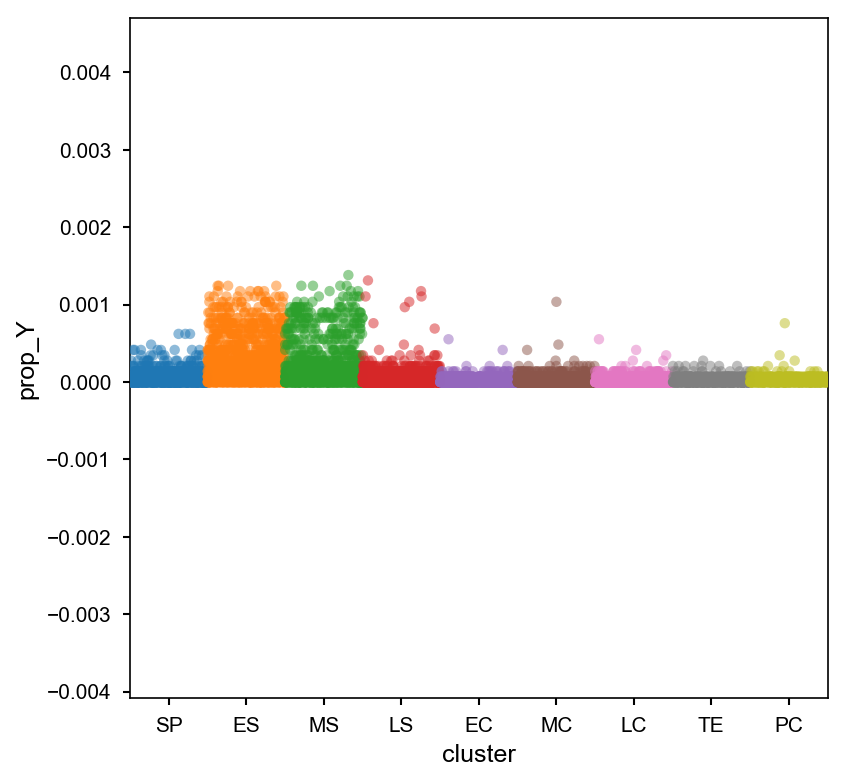

In [110]:
prop_Y = (raw_Y > 0).sum() / raw.shape[0]
prop_Y.name = 'prop_Y'

_dat = pd.concat([prop_Y, clusters], axis=1, sort=True)

ax = sns.stripplot('cluster', 'prop_Y', data=_dat, jitter=.5, alpha=.5)

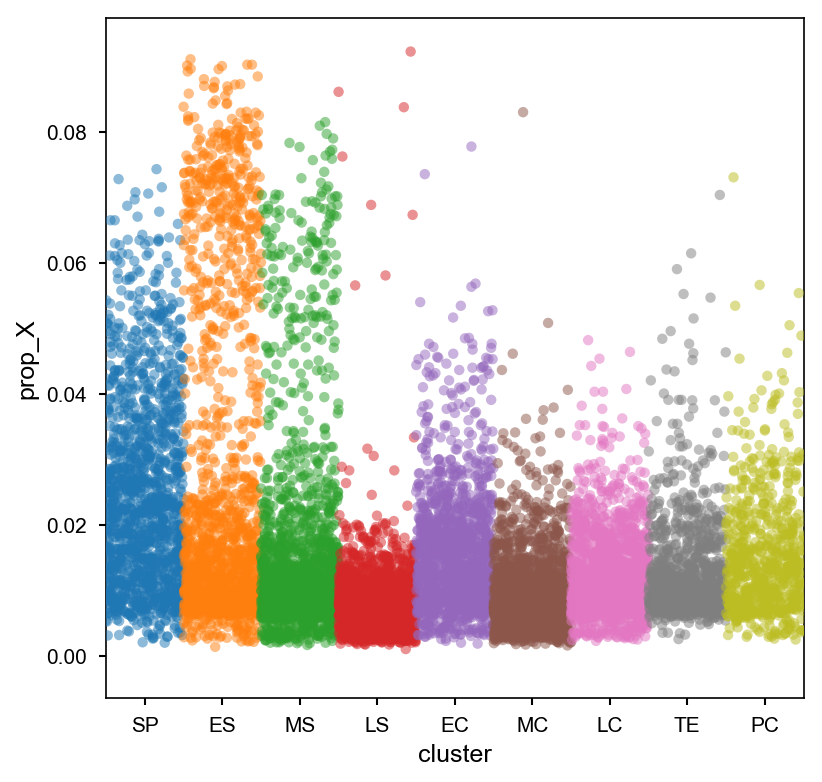

In [109]:
prop_X = (raw_X > 0).sum() / raw.shape[0]
prop_X.name = 'prop_X'

_dat = pd.concat([prop_X, clusters], axis=1, sort=True)

ax = sns.stripplot('cluster', 'prop_X', data=_dat, jitter=.5, alpha=.5)

In [71]:
_dat.groupby('cluster').sum()

,prop_Y
cluster,
SP,0.055195
ES,0.336557
MS,0.241572
LS,0.088837
EC,0.017408
MC,0.031293
LC,0.024731
TE,0.012020
PC,0.010984


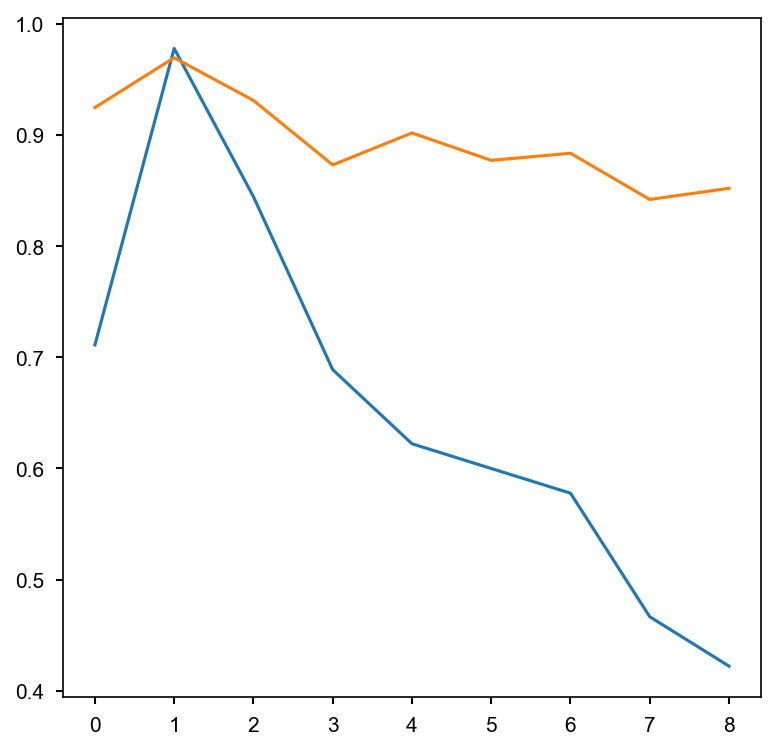

In [104]:
Y_by_clus = raw_Y.T.join(clusters).groupby('cluster').sum().T
prop_Y_by_clus = (Y_by_clus > 0).sum() / Y_by_clus.shape[0]
plt.plot(prop_Y_by_clus.values)

X_by_clus = raw_X.T.join(clusters).groupby('cluster').sum().T
prop_X_by_clus = (X_by_clus > 0).sum() / X_by_clus.shape[0]
plt.plot(prop_X_by_clus.values)

In [100]:
tpm_Y = tpm.reindex(Y).dropna()
tpm_X = tpm.reindex(X).dropna()

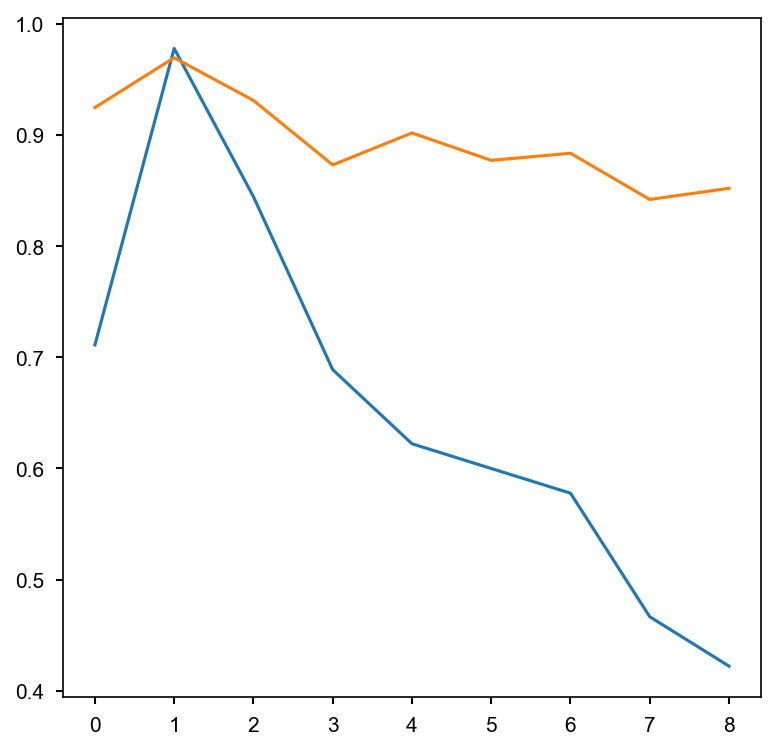

In [103]:
prop_Y_by_clus = (tpm_Y > 0).sum() / tpm_Y.shape[0]
plt.plot(prop_Y_by_clus.values)

prop_X_by_clus = (tpm_X > 0).sum() / tpm_X.shape[0]
plt.plot(prop_X_by_clus.values)

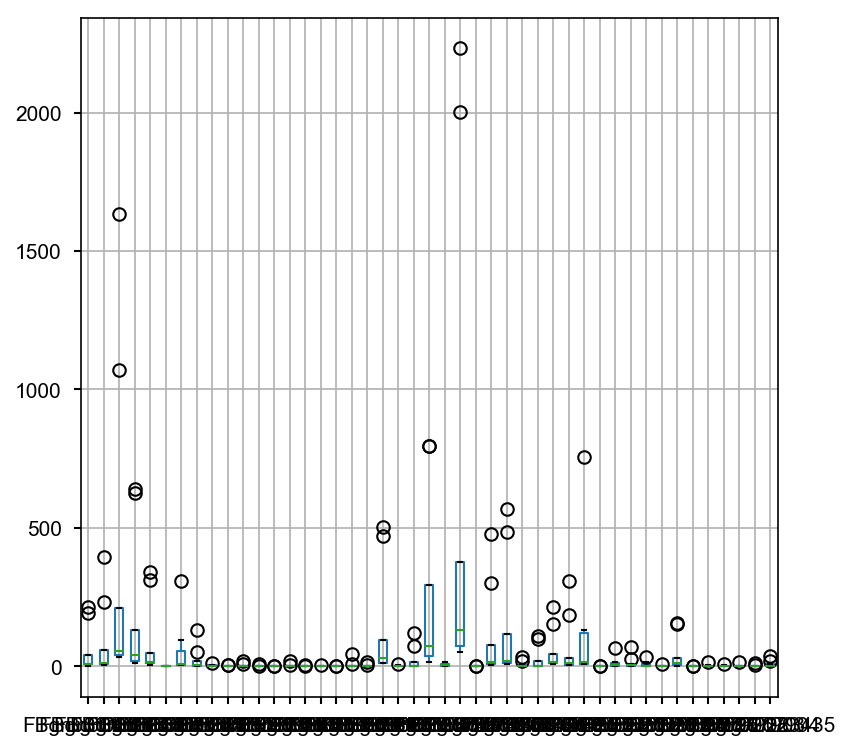

In [117]:
raw_Y.T.join(clusters).groupby('cluster').sum().boxplot()

In [192]:
gene_cnts = nbconfig.fbgn2chrom.reindex(raw.index).dropna().groupby('chrom').size()
gene_cnts

chrom
chr2L    2798
chr2R    2897
chr3L    2903
chr3R    3510
chr4      102
chrM       18
chrX     2189
chrY       45
dtype: int64

In [238]:
scaled = np.log1p(reads_by_chrom.div(gene_cnts, axis='columns'))
scaled.head()

chrom,chr2L,chr2R,chr3L,chr3R,chr4,chrM,chrX,chrY
cell_id,,,,,,,,
rep1_AAACCTGAGACAAGCC,0.097323,0.116517,0.074329,0.102279,0.009756,1.491655,0.091190,0.000000
rep1_AAACCTGAGCTTATCG,0.063689,0.116209,0.062103,0.065606,0.066375,1.897120,0.106502,0.000000
rep1_AAACCTGGTGTAATGA,0.057635,0.069016,0.046113,0.044576,0.093526,2.268684,0.061565,0.000000
rep1_AAACCTGGTTCATGGT,0.455650,0.384654,0.296513,0.394580,0.187212,1.540445,0.224513,0.043485
rep1_AAACCTGTCCCTCTTT,0.036151,0.046865,0.029529,0.032514,0.038466,1.516347,0.039414,0.000000


In [239]:
_dat = scaled.join(clusters)[['chrX', 'chrY', 'cluster']]
_dat.index.name = 'cell_id'

In [240]:
melted = _dat.reset_index().melt(id_vars=['cell_id', 'cluster'], var_name = 'chrom', value_name='prop_reads')
melted.set_index('cell_id', inplace=True)

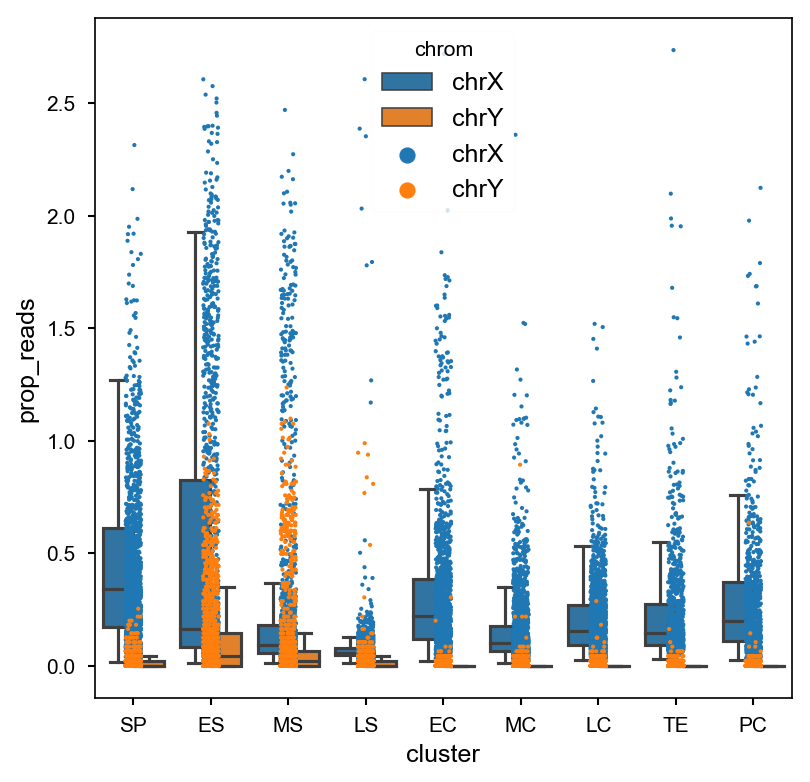

In [250]:
ax = sns.boxplot(y='prop_reads', x='cluster', hue='chrom', data=melted, showfliers=False)
sns.stripplot(y='prop_reads', x='cluster', hue='chrom', data=melted, s=2)

In [235]:
_dat['chrX'] = (_dat['chrX'] - _dat['chrX'].min()) / (_dat['chrX'].max() - _dat['chrX'].min())
_dat['chrY'] = (_dat['chrY'] - _dat['chrY'].min()) / (_dat['chrY'].max() - _dat['chrY'].min())

In [124]:
sp = raw_Y.reindex(columns=clusters[clusters == 'SP'].index)

In [152]:
reads_by_chrom = raw.join(nbconfig.fbgn2chrom).groupby('chrom').sum().T

In [155]:
totals = reads_by_chrom.sum(axis=1)

In [158]:
prop_reads_by_chrom = reads_by_chrom.div(totals, axis='index')

In [160]:
prop_reads_Y = prop_reads_by_chrom.chrY

In [167]:
mm = (prop_reads_Y - prop_reads_Y.min()) / (prop_reads_Y.max() - prop_reads_Y.min())

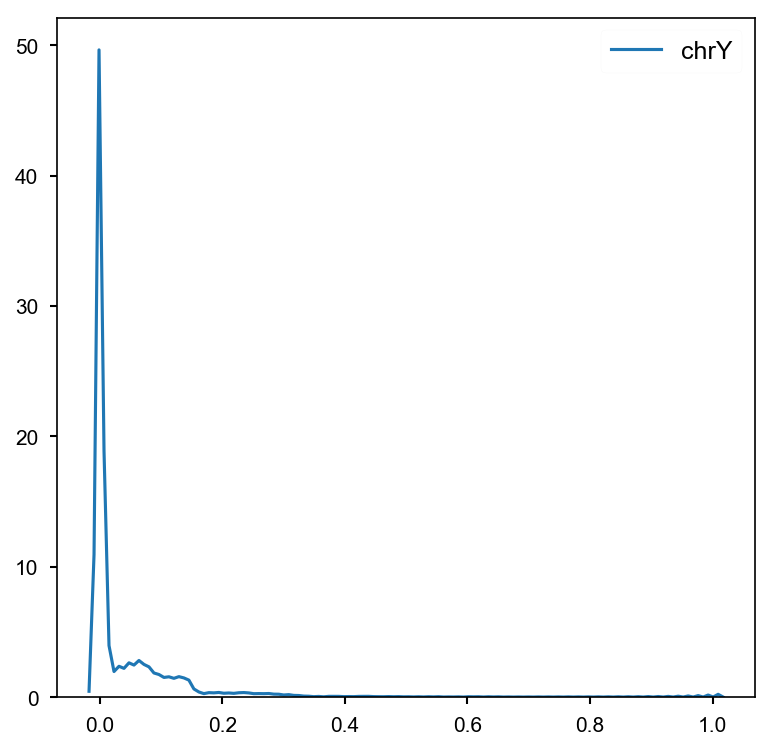

In [169]:
sns.kdeplot(mm)

In [183]:
grp = pd.concat([prop_reads_Y, clusters], axis=1, sort=True).dropna().groupby('cluster')

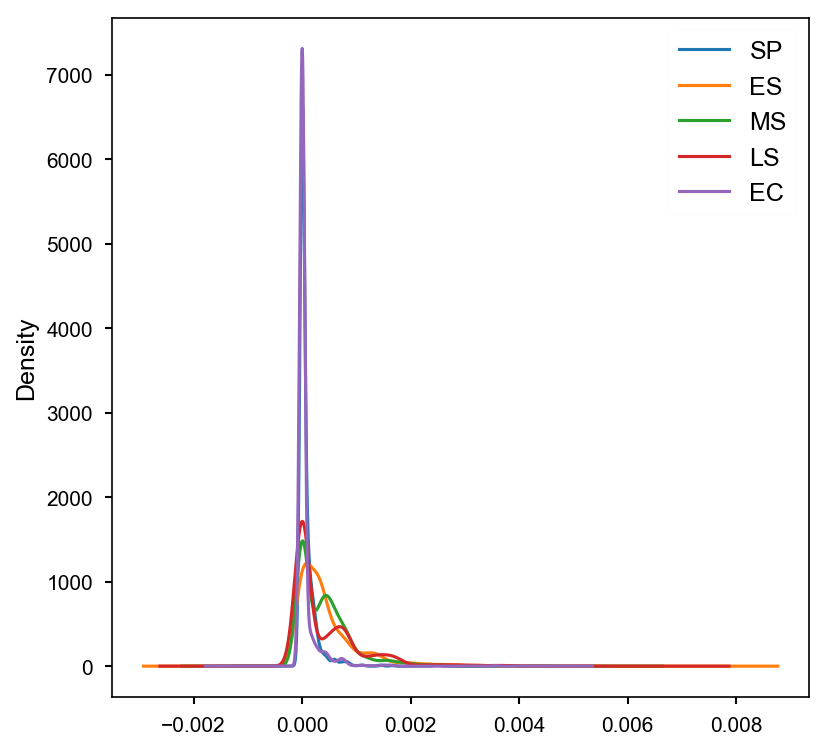

In [184]:
grp.get_group('SP').chrY.plot(kind='kde', label='SP')
grp.get_group('ES').chrY.plot(kind='kde', label='ES')
grp.get_group('MS').chrY.plot(kind='kde', label='MS')
grp.get_group('LS').chrY.plot(kind='kde', label='LS')
grp.get_group('EC').chrY.plot(kind='kde', label='EC')
plt.legend()